In [1]:
import numpy as np

In [2]:
class preceptron(object):
    def __init__(self, nu=0.01,n_iter=2):
        self.nu=nu
        self.n_iter=n_iter
    def fit(self,x,y):
        self.w_=np.zeros(1+x.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors=0
            for xi, target in zip(x,y):
                update=self.nu *(target -self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
                print(self.predict(xi))
            self.errors_.append(errors)
        return self,self.w_
    def net_input(self,x):
        return np.dot(x,self.w_[1:]) + self.w_[0]
    def predict(self,x):
        return np.where(self.net_input(x)>=0.0, 1, -1)

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
...   'machine-learning-databases/iris/iris.data', header=None)


In [5]:
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
import matplotlib.pyplot as plt

In [7]:
y = df.iloc[0:100, 4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [8]:
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [9]:
x = df.iloc[0:100, [0, 2]].values
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

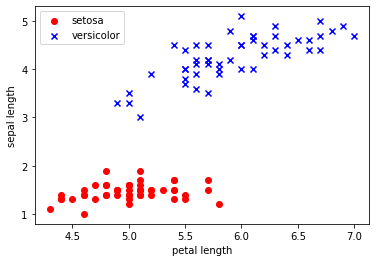

In [10]:

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [11]:
ppn = preceptron(nu=0.1, n_iter=2)


In [12]:
ppn.fit(x, y)


-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


(<__main__.preceptron at 0x240d6a08ac0>, array([0.  , 0.76, 1.32]))

In [27]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

TypeError: can only concatenate list (not "int") to list

In [14]:
u=zip(x,y)
list(u)

[(array([5.1, 1.4]), -1),
 (array([4.9, 1.4]), -1),
 (array([4.7, 1.3]), -1),
 (array([4.6, 1.5]), -1),
 (array([5. , 1.4]), -1),
 (array([5.4, 1.7]), -1),
 (array([4.6, 1.4]), -1),
 (array([5. , 1.5]), -1),
 (array([4.4, 1.4]), -1),
 (array([4.9, 1.5]), -1),
 (array([5.4, 1.5]), -1),
 (array([4.8, 1.6]), -1),
 (array([4.8, 1.4]), -1),
 (array([4.3, 1.1]), -1),
 (array([5.8, 1.2]), -1),
 (array([5.7, 1.5]), -1),
 (array([5.4, 1.3]), -1),
 (array([5.1, 1.4]), -1),
 (array([5.7, 1.7]), -1),
 (array([5.1, 1.5]), -1),
 (array([5.4, 1.7]), -1),
 (array([5.1, 1.5]), -1),
 (array([4.6, 1. ]), -1),
 (array([5.1, 1.7]), -1),
 (array([4.8, 1.9]), -1),
 (array([5. , 1.6]), -1),
 (array([5. , 1.6]), -1),
 (array([5.2, 1.5]), -1),
 (array([5.2, 1.4]), -1),
 (array([4.7, 1.6]), -1),
 (array([4.8, 1.6]), -1),
 (array([5.4, 1.5]), -1),
 (array([5.2, 1.5]), -1),
 (array([5.5, 1.4]), -1),
 (array([4.9, 1.5]), -1),
 (array([5. , 1.2]), -1),
 (array([5.5, 1.3]), -1),
 (array([4.9, 1.5]), -1),
 (array([4.4

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


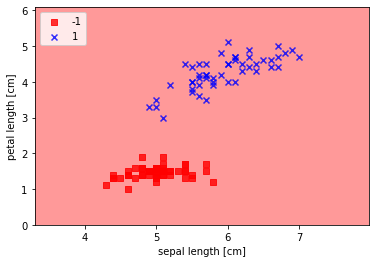

In [16]:
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [26]:
nu=0.01
w_=np.array([0.4,1,0.5])
predict=1
errors=0
errors_=[]
for xi, target in zip(x,y):
    print(xi)
    print(target)
    update=nu *(target -predict)
    print(update)
    w_[1:] += update*xi
    w_[0] += update
    print(w_)
    errors += int(update != 0.0)
    print(errors)
errors_.append(errors)
print(errors)
    

[5.1 1.4]
-1
-0.02
[0.38  0.898 0.472]
1
[4.9 1.4]
-1
-0.02
[0.36  0.8   0.444]
2
[4.7 1.3]
-1
-0.02
[0.34  0.706 0.418]
3
[4.6 1.5]
-1
-0.02
[0.32  0.614 0.388]
4
[5.  1.4]
-1
-0.02
[0.3   0.514 0.36 ]
5
[5.4 1.7]
-1
-0.02
[0.28  0.406 0.326]
6
[4.6 1.4]
-1
-0.02
[0.26  0.314 0.298]
7
[5.  1.5]
-1
-0.02
[0.24  0.214 0.268]
8
[4.4 1.4]
-1
-0.02
[0.22  0.126 0.24 ]
9
[4.9 1.5]
-1
-0.02
[0.2   0.028 0.21 ]
10
[5.4 1.5]
-1
-0.02
[ 0.18 -0.08  0.18]
11
[4.8 1.6]
-1
-0.02
[ 0.16  -0.176  0.148]
12
[4.8 1.4]
-1
-0.02
[ 0.14  -0.272  0.12 ]
13
[4.3 1.1]
-1
-0.02
[ 0.12  -0.358  0.098]
14
[5.8 1.2]
-1
-0.02
[ 0.1   -0.474  0.074]
15
[5.7 1.5]
-1
-0.02
[ 0.08  -0.588  0.044]
16
[5.4 1.3]
-1
-0.02
[ 0.06  -0.696  0.018]
17
[5.1 1.4]
-1
-0.02
[ 0.04  -0.798 -0.01 ]
18
[5.7 1.7]
-1
-0.02
[ 0.02  -0.912 -0.044]
19
[5.1 1.5]
-1
-0.02
[-6.24500451e-17 -1.01400000e+00 -7.40000000e-02]
20
[5.4 1.7]
-1
-0.02
[-0.02  -1.122 -0.108]
21
[5.1 1.5]
-1
-0.02
[-0.04  -1.224 -0.138]
22
[4.6 1. ]
-1
-0.02
[-0.06